### Обнаружение углов

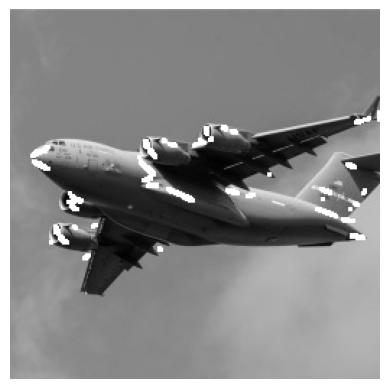

In [3]:
# Детектор углов Харриса cornerHarris
import cv2
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
from numpy.ma.core import minimum

image_bgr = cv2.imread("../data/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 2
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(image_gray, block_size, aperture, free_parameter)

detector_responses = cv2.dilate(detector_responses, None)

threshold = 0.02
image_bgr[detector_responses > threshold * detector_responses.max()] = [255, 255, 255]
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.axis("off")
plt.show()

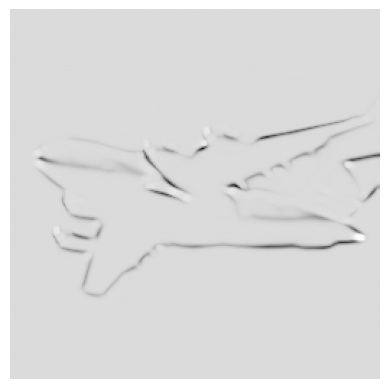

In [4]:
plt.imshow(detector_responses, cmap='gray')
plt.axis("off")
plt.show()

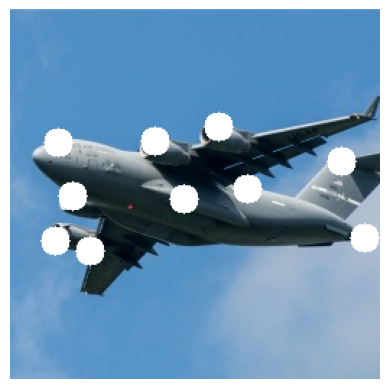

In [5]:
image_bgr = cv2.imread("../data/images/plane_256x256.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

corners = cv2.goodFeaturesToTrack(image_gray, corners_to_detect, minimum_quality_score, minimum_distance)
corners = np.float32(corners)

for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (int(x), int(y)), 10, (255, 255, 255), -1)

image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb, cmap='gray')
plt.axis("off")
plt.show()

### Создание признаков для машинного самообучения

In [6]:
# Метод flatten from NumPy, чтобы преобразовать многомерный массив с данными изображения в вектор,
# содержащий значения наблюдения:

image = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
image_10x10 = cv2.resize(image, (10,10))
image_10x10.flatten()

array([133, 130, 130, 129, 130, 129, 129, 128, 128, 127, 135, 131, 131,
       131, 130, 130, 129, 128, 128, 128, 134, 132, 131, 131, 130, 129,
       129, 128, 130, 133, 132, 158, 130, 133, 130,  46,  97,  26, 132,
       143, 141,  36,  54,  91,   9,   9,  49, 144, 179,  41, 142,  95,
        32,  36,  29,  43, 113, 141, 179, 187, 141, 124,  26,  25, 132,
       135, 151, 175, 174, 184, 143, 151,  38, 133, 134, 139, 174, 177,
       169, 174, 155, 141, 135, 137, 137, 152, 169, 168, 168, 179, 152,
       139, 136, 135, 137, 143, 159, 166, 171, 175], dtype=uint8)

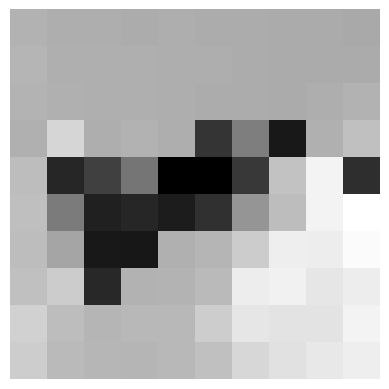

In [7]:
plt.imshow(image_10x10, cmap='gray')
plt.axis("off")
plt.show()

### Кодирование среднего цвета в качестве признака


array([[ 90.52377319, 133.11940002, 169.02355957]])

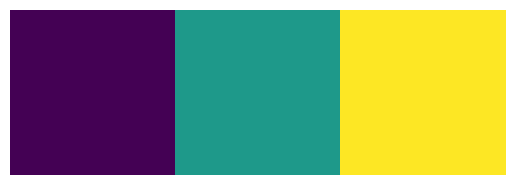

In [13]:
image_bgr = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
channels = cv2.mean(image_bgr)
observation = np.array([(channels[2],channels[1],channels[0])])
observation
plt.imshow(observation)
plt.axis("off")
observation

### Кодирование гистограмм цветовых каналов в качестве признаков

In [15]:
image_bgr = cv2.imread("../data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Создадим список для значений признаков и вычисление гистограммы для каждого цветового канала
features = []
colors = ("r", "g", "b")

for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0, 256])
    features.extend(histogram)

observation = np.array(features).flatten()
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

In [16]:
image_rgb[0,0]

array([107, 163, 212], dtype=uint8)

Сделаем пример простой гистограммы, чтобы позже применить ее на RGB пикселях

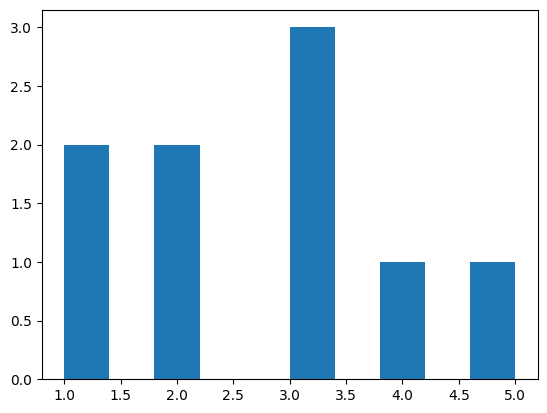

In [17]:
import pandas as pd
data = pd.Series([1,1,2,2,3,3,3,4,5])
data.hist(grid=False)
plt.show()

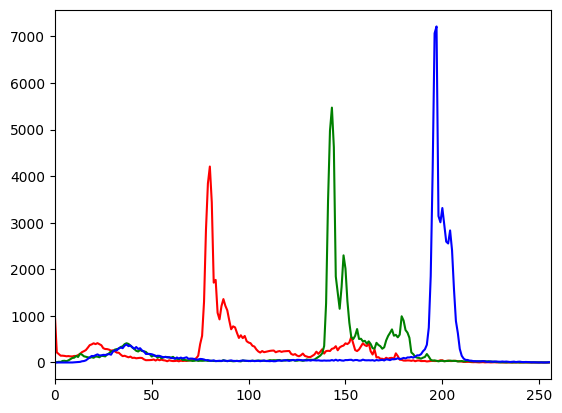

In [18]:
colors = ("r", "g", "b")
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb],
                             [i],
                             None,
                             [256],
                             [0, 256])
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()